# a. Data Processing

In [113]:
import pandas as pd

# 1. Download and read the data
train_data = pd.read_csv('/Users/ritikanigam/Downloads/data_train-2.csv')
test_data = pd.read_csv('/Users/ritikanigam/Downloads/data_test-2.csv')

# 2. Print the first 5 rows of the training data and its shape
print("First 5 rows of training data:")
print(train_data.head())


print("\nShape of training data:", train_data.shape)


First 5 rows of training data:
   Unnamed: 0  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0           0        797.0    -200.0       2.1          593.0    146.0   
1           1       1282.0    -200.0      11.0         1013.0    354.0   
2           2        891.0    -200.0       7.6          882.0    342.0   
3           3       1285.0    -200.0      18.1         1243.0    481.0   
4           4        892.0    -200.0       7.3          869.0     71.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1212.0     72.0         984.0        494.0  10.8  49.7  0.6429  
1         545.0    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2         885.0    149.0         950.0        894.0   7.8  33.9  0.3594  
3         599.0    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4         953.0     77.0        1363.0        632.0  37.4  14.7  0.9295  

Shape of training data: (6250, 13)


Description of the data:
The dataset consists of total 13 columns in which 12 columns are the features and 1 column represents the label of the training dataset.These data are the average concentration of various chemical constituents present in the air which are responsible for assessing air quality.

In [114]:
# 4. Check for missing values and return the number of missing values
missing_values_train = train_data.isnull().sum()


print("Missing values in training data:")
print(missing_values_train)


# 5. Drop all rows with any missing data
train_data.dropna(inplace=True)


# Verify that missing values are handled
print("\nAfter dropping missing values, shape of training data:", train_data.shape)


# 6. Extract features and labels
features_train = train_data.drop(columns=['PT08.S1(CO)'])
label_train = train_data['PT08.S1(CO)']

features_test = test_data  # Only features are present in the test data

# Verify the shapes
print("\nShape of features_train:", features_train.shape)
print("Shape of label_train:", label_train.shape)
print("Shape of features_test:", features_test.shape)


Missing values in training data:
Unnamed: 0        0
PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64

After dropping missing values, shape of training data: (6173, 13)

Shape of features_train: (6173, 12)
Shape of label_train: (6173,)
Shape of features_test: (3221, 12)


# b. Exploratory Data Analysis

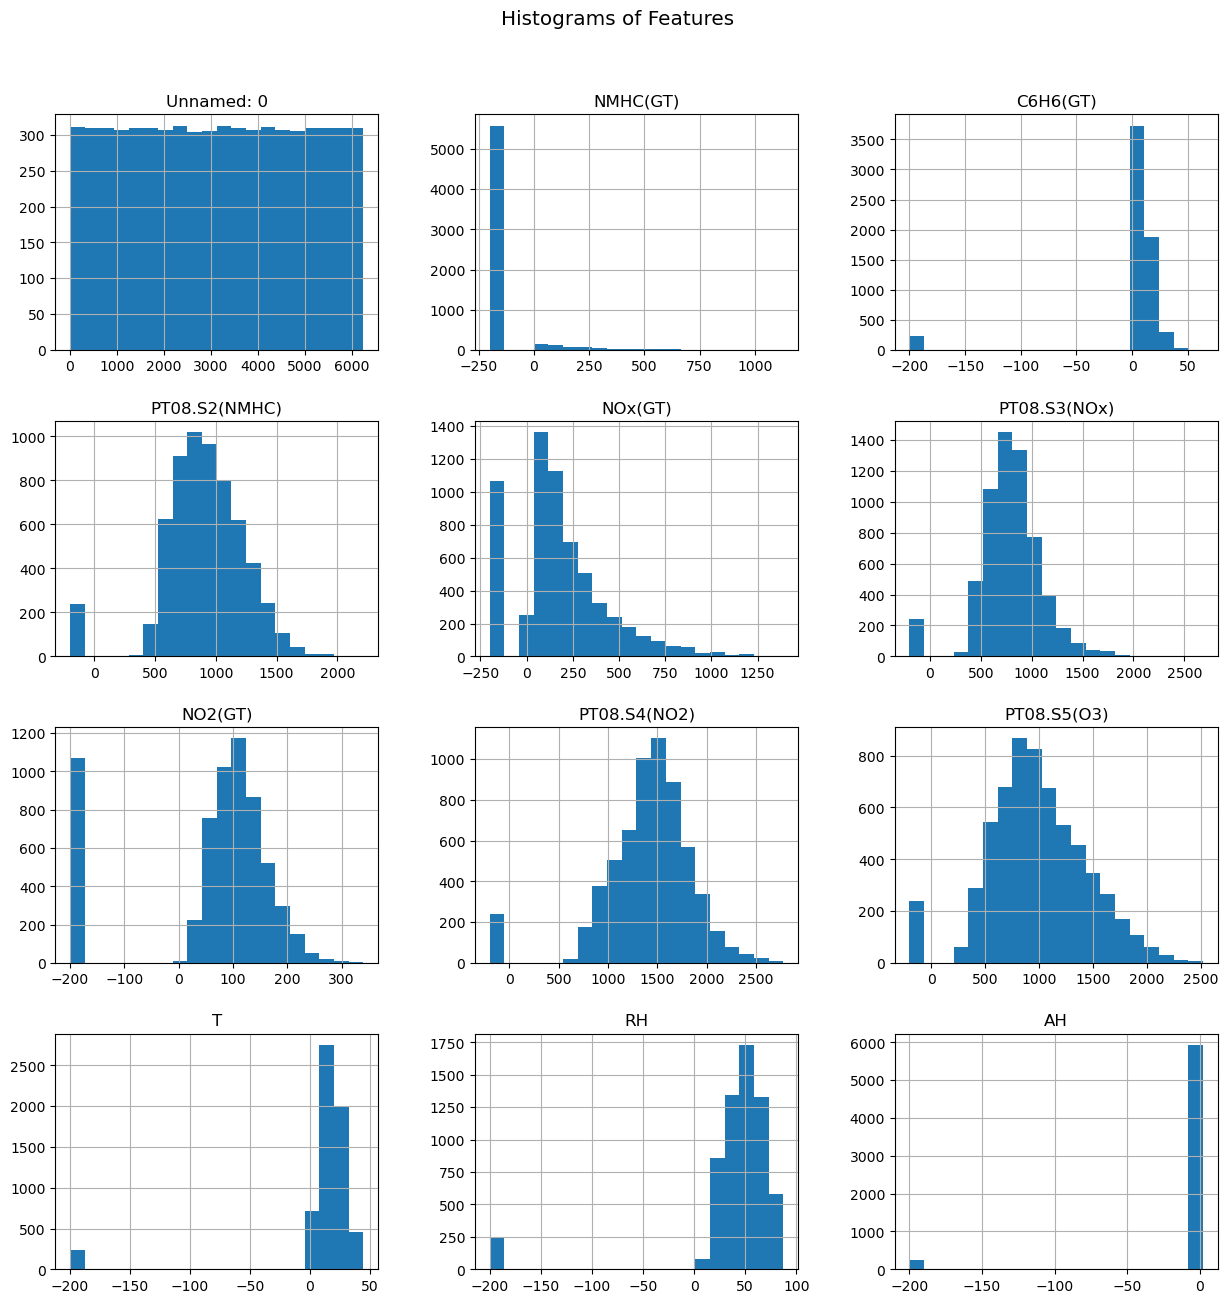

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot histograms of all features
features_train.hist(figsize=(15, 15), bins=20)
plt.suptitle('Histograms of Features', x=0.5, y=0.95, ha='center', fontsize='x-large')
plt.show()




No all features do not have normal distribution (for example, NHMC(GT), C6H6(GT) and AH )
Yes, there are outlier values for temperature, Relative humidity and absolute humidity. Yes, I think we can use a Min-Max Scaling technique that scales the values between a specified range (commonly 0 and 1). It is suitable for features that do not follow a normal distribution and may have a skewed distribution.

In [116]:
#Scaling training data using Min-Max Scaling technique
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
features_train_normalized = scaler.fit_transform(features_train)

# Create a new Pandas DataFrame with the scaled features
columns = features_train.columns
features_train_normalized_df = pd.DataFrame(features_train_normalized, columns=columns)



/Users/ritikanigam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ritikanigam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


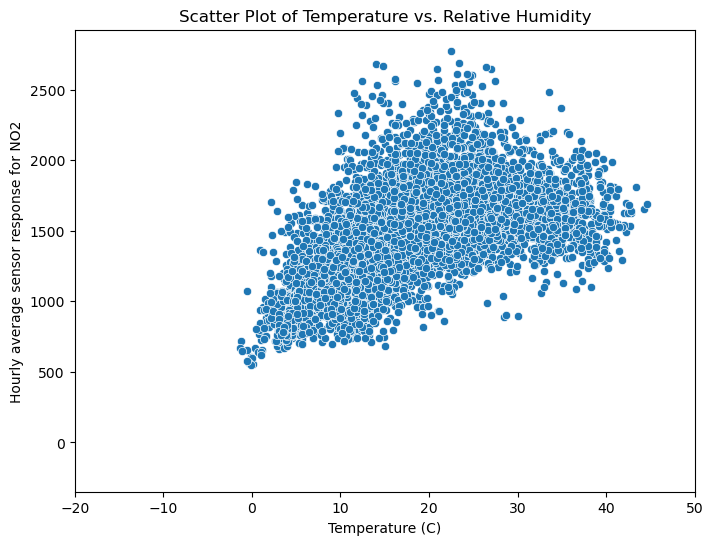

In [117]:

# 2. Scatter plot of two features to illustrate correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='T', y='PT08.S4(NO2)', data=train_data)
plt.title('Scatter Plot of Temperature vs. Relative Humidity')
plt.xlabel('Temperature (C)')
plt.ylabel('Hourly average sensor response for NO2')
# Set x-axis range
plt.xlim(-20, 50)
plt.show()



I have plotted scatterplot for features Temperature and PT08.S4(NO2): hourly averaged sensor response for NO2. The above scatterplot shows that these two features are positively correlated with each other. 

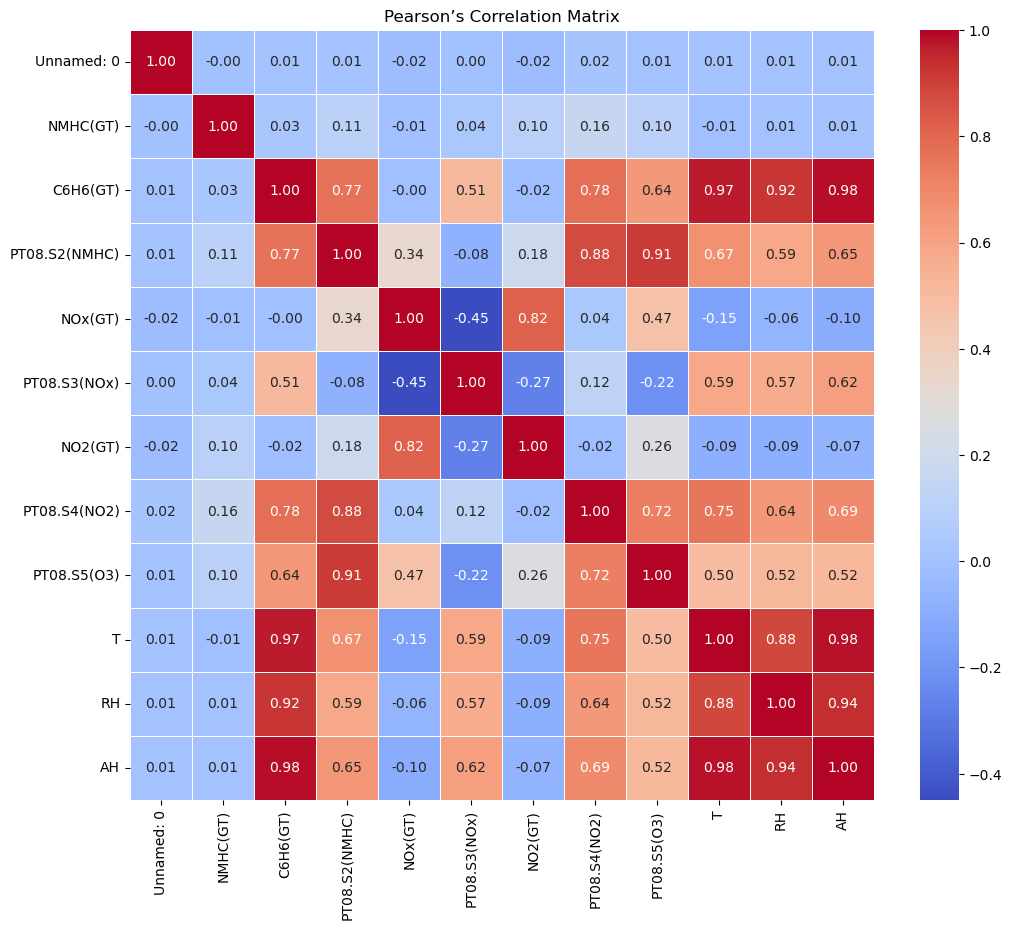

In [118]:
# 3. Compute Pearson’s correlation matrix and visualize with a heatmap
correlation_matrix = features_train.iloc[:, :12].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Pearson’s Correlation Matrix')
plt.show()

In the heatmap plotted above, positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero suggest a weak correlation. We can interpret the heatmap to identify potential associations between the considered variables. So we can infer the correlations between various features of the training dataset. We observe that the feature C6H6(GT) and T have correlation value of 0.97 which suggests that these two features are highly correlated and also has a positive correlation i.e. if the value of Temperature increase then the hourly average beneze concentration also increases.

# c. Linear Regression Implementation

In [119]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            # Predictions
            y_pred = self.predict(X)

            # Compute gradients
            dw = (1/num_samples) * np.dot(X.T, (y_pred - y))
            db = (1/num_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



# Example usage:
# Instantiate the linear regression model
lr_model = LinearRegression(learning_rate=0.01, num_iterations=1000)

# Train the model
lr_model.fit(features_train_normalized_df, label_train)

# Make predictions on the test data
#y_pred = lr_model.predict(features_test)

print("Trained Weights:", lr_model.weights)
print("Trained Bias:", lr_model.bias)



Trained Weights: [ -0.43985474  44.11542747 191.15769387 223.70125937  98.15297247
 -21.56256849  69.37849482 211.81318761 265.7022535  176.82355173
 183.39993275 197.61643554]
Trained Bias: 43.5718276161182


# d. Logistic Regression Implementation

In [120]:
import pandas as pd



# Create a binary label based on the condition
label_train_binary = (label_train > 1000.0).astype(int)

# Display the original features and the newly created binary label
# df_with_binary_label = pd.concat([features_train_normalized_df, pd.DataFrame(label_train_binary, columns=['BinaryLabel'])], axis=1)
# print(df_with_binary_label.head())
print (label_train.head())
print (label_train_binary.head())


0     797.0
1    1282.0
2     891.0
3    1285.0
4     892.0
Name: PT08.S1(CO), dtype: float64
0    0
1    1
2    0
3    1
4    0
Name: PT08.S1(CO), dtype: int64


In [129]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            # Linear combination of weights and input features
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply sigmoid function to obtain probabilities
            predictions = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1/num_samples) * np.dot(X.T, (predictions - y))
            db = (1/num_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Linear combination of weights and input features
        linear_model = np.dot(X, self.weights) + self.bias

        # Apply sigmoid function to obtain probabilities
        predictions = self.sigmoid(linear_model)

        # Convert probabilities to binary predictions (0 or 1)
        binary_predictions = (predictions > 0.5).astype(int)

        return binary_predictions



# Create a binary label based on the condition
#y_train_binary = (y_train > 1000).astype(int)

# Instantiate the logistic regression model
logistic_model = LogisticRegression(learning_rate=0.01, num_iterations=10000)

# Train the model
logistic_model.fit(features_train_normalized_df,label_train_binary )

# Make predictions on the training set
y_train_pred = logistic_model.predict(features_train_normalized_df)

# Print the trained parameters (weights and bias)
print("Trained Weights:", logistic_model.weights)
print("Trained Bias:", logistic_model.bias)


Trained Weights: [-0.28432793  0.40416456  0.24422688  2.11316172  1.0061345  -1.93305191
  0.54193441  1.63474768  2.77995992 -0.17453319 -0.18170746 -0.32199741]
Trained Bias: -1.7174829487538739


# e. Result Analysis: Linear Regression

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np



# Function to calculate Root Mean Squared Error (RMSE)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function for 5-fold cross-validation
def cross_validation(model, X, y, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    rmse_values = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate RMSE and store it
        rmse = calculate_rmse(y_val, y_pred)
        rmse_values.append(rmse)

    return rmse_values

# Instantiate the linear regression model
lr_model = LinearRegression(learning_rate=0.01, num_iterations=10000)

# Perform 5-fold cross-validation
rmse_values = cross_validation(lr_model, features_train_normalized_df, label_train)

# Report average and standard deviation of RMSE values
average_rmse = np.mean(rmse_values)
std_dev_rmse = np.std(rmse_values)

print("RMSE Values for 5 Folds:", rmse_values)
print("\nAverage RMSE:", average_rmse)
print("Standard Deviation of RMSE:", std_dev_rmse)

# Access coefficients (weights) of the trained model
coefficients = lr_model.weights

# Identify the most informative features based on coefficients
most_informative_features = np.argsort(np.abs(coefficients))[::-1]
print("\nMost Informative Features (Descending Order):", most_informative_features)



RMSE Values for 5 Folds: [72.29761499977974, 76.88943649640828, 73.24961244312314, 73.16837891805089, 76.16058567804257]

Average RMSE: 74.35312570708092
Standard Deviation of RMSE: 1.8191357680153817

Most Informative Features (Descending Order): [ 8  3  7  2 10  1  5 11  4  9  6  0]


No I don't see big difference in RMSE values across different fold. This suggests that the model is reliable and performs consistently well on different subsets of the data. In order to find the most informative features I have  access the coefficients (weights) of the trained linear regression model and then identify the most informative features based on the magnitude of these coefficients. So from the above output we can infer that feature 8 (PT08.S4(NO2): hourly averaged sensor response for NO2) is the most informative feature followed by the feature 3 (C6H6(GT): hourly averaged Benzene concentration) and so on. The values in the output are the feature indices in the train dataset arranged in descending order of informative feature.

# f. Result Analysis - Logistic Regression

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import numpy as np

# Function to calculate evaluation metrics for each fold
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Function for 5-fold cross-validation
def cross_validation_metrics(model, X, y, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    metrics_list = []

    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate evaluation metrics and store them
        metrics = calculate_metrics(y_val, y_pred)
        metrics_list.append(metrics)

        # Display the results for each fold
        print(f"Fold {fold} - Accuracy: {metrics[0]:.2f}, Precision: {metrics[1]:.2f}, Recall: {metrics[2]:.2f}, F1 Score: {metrics[3]:.2f}")

    return np.array(metrics_list)

# Perform 5-fold cross-validation and get metrics
metrics_array = cross_validation_metrics(logistic_model, features_train_normalized_df, label_train_binary)

# Report average and standard deviation of metrics
average_metrics = np.mean(metrics_array, axis=0)
std_dev_metrics = np.std(metrics_array, axis=0)

# Display the results for average metrics
print("\nAverage Accuracy: {:.2f} ± {:.2f}".format(average_metrics[0], std_dev_metrics[0]))
print("Average Precision: {:.2f} ± {:.2f}".format(average_metrics[1], std_dev_metrics[1]))
print("Average Recall: {:.2f} ± {:.2f}".format(average_metrics[2], std_dev_metrics[2]))
print("Average F1 Score: {:.2f} ± {:.2f}".format(average_metrics[3], std_dev_metrics[3]))


Fold 1 - Accuracy: 0.86, Precision: 0.83, Recall: 0.96, F1 Score: 0.89
Fold 2 - Accuracy: 0.89, Precision: 0.87, Recall: 0.97, F1 Score: 0.91
Fold 3 - Accuracy: 0.86, Precision: 0.84, Recall: 0.94, F1 Score: 0.89
Fold 4 - Accuracy: 0.85, Precision: 0.83, Recall: 0.95, F1 Score: 0.88
Fold 5 - Accuracy: 0.86, Precision: 0.84, Recall: 0.95, F1 Score: 0.89

Average Accuracy: 0.86 ± 0.01
Average Precision: 0.84 ± 0.01
Average Recall: 0.95 ± 0.01
Average F1 Score: 0.89 ± 0.01


No I do not observe big change in metrics across different folds. The low standart deviation suggest that the model's performance is relatively stable across different subsets of the data in the cross-validation process.

# g. ROC Curve - Logistic Regression

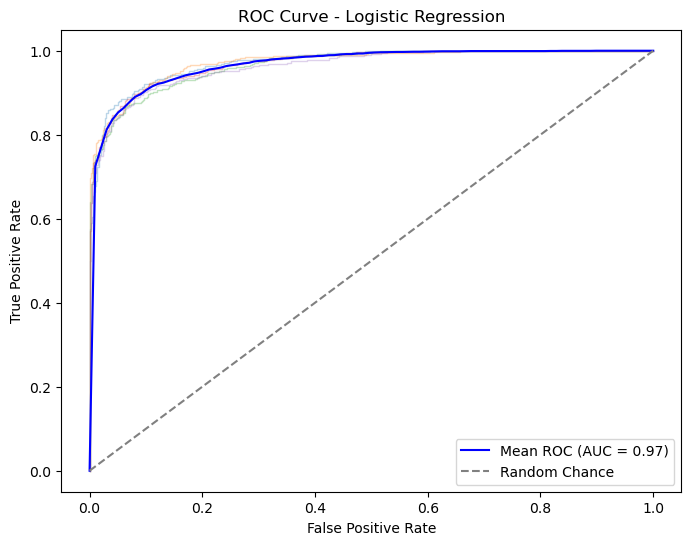

In [107]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np



# Instantiate logistic regression model from scikit-learn
sklearn_logistic_model = LogisticRegression()

# Function to plot ROC curve and compute AUC for each fold
def plot_roc_curve(model, X, y, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    plt.figure(figsize=(8, 6))
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model on the training set
        model.fit(X_train, y_train)

        # Get predicted probabilities for positive class
        y_probs = model.predict_proba(X_val)[:, 1]

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_probs)

        # Interpolate to obtain smooth ROC curve
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

        # Plot ROC curve for each fold
        plt.plot(fpr, tpr, lw=1, alpha=0.3)

    # Plot mean ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')

    # Plot random chance line
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Logistic Regression')
    plt.legend()
    plt.show()

# Perform 5-fold cross-validation and plot ROC curve
plot_roc_curve(sklearn_logistic_model, features_train_normalized_df, label_train_binary)


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate metrics for each fold
def calculate_metrics(model, X, y, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model on the training set
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Append metrics to lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print metrics for each fold (optional)
        print(f'Fold - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

    # Calculate average and standard deviation of metrics
    avg_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)

    avg_precision = np.mean(precision_scores)
    std_precision = np.std(precision_scores)

    avg_recall = np.mean(recall_scores)
    std_recall = np.std(recall_scores)

    avg_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)

    # Print average and standard deviation of metrics
    print(f'\nAverage Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}')
    print(f'Average Precision: {avg_precision:.2f} ± {std_precision:.2f}')
    print(f'Average Recall: {avg_recall:.2f} ± {std_recall:.2f}')
    print(f'Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}')

# Calculate metrics for 5-fold cross-validation
calculate_metrics(sklearn_logistic_model, features_train_normalized_df, label_train_binary)


Fold - Accuracy: 0.91, Precision: 0.91, Recall: 0.93, F1 Score: 0.92
Fold - Accuracy: 0.91, Precision: 0.92, Recall: 0.94, F1 Score: 0.93
Fold - Accuracy: 0.89, Precision: 0.92, Recall: 0.90, F1 Score: 0.91
Fold - Accuracy: 0.90, Precision: 0.91, Recall: 0.93, F1 Score: 0.92
Fold - Accuracy: 0.90, Precision: 0.91, Recall: 0.92, F1 Score: 0.92

Average Accuracy: 0.90 ± 0.01
Average Precision: 0.92 ± 0.00
Average Recall: 0.92 ± 0.01
Average F1 Score: 0.92 ± 0.01


In order to compare the performance of the two logistic regression model i.e. Logistic regression implemented from scratch and logistic regression model from sklearn, I have computed the metric values for both the model.On comparing the Accuravy values of the logistic regression model (Accuracy:0.86) I implemented from the scratch and the model I used from sklearn (Accuracy:0.91), I conclude that both the model have almost similar accuracy suggesting my model works almost close to the model from sklearn

# h. Inference

In [109]:
# Normalizing the test data

# Use the same scaler to transform the test data
features_test_normalized = scaler.transform(features_test)

# Create a new Pandas DataFrame with the scaled test features
columns = features_test.columns
features_test_normalized_df = pd.DataFrame(features_test_normalized, columns=columns)


In [133]:
import pandas as pd


# Use the linear regression model to predict PT08.S1(CO) values
linear_regression_predictions = lr_model.predict(features_test_normalized_df)

# Use the logistic regression model to predict binary values
logistic_regression_predictions = logistic_model.predict(features_test_normalized_df)

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({
    'pred_linear': linear_regression_predictions,
    'pred_logistic': logistic_regression_predictions
})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")



Predictions saved to 'predictions.csv'
